###TASK 1

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
from google.colab.patches import cv2_imshow

# Task 1: Image Compression

def compress_image(image_path, output_path, quality=50, format='JPEG'):
    # Check if the image was loaded successfully
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}. Check the file path.")
        return  # Exit the function if image loading failed

    cv2.imwrite(output_path, image, [cv2.IMWRITE_JPEG_QUALITY if format == 'JPEG' else cv2.IMWRITE_PNG_COMPRESSION, quality])
    compressed_image = cv2.imread(output_path)
    compressed_image = cv2.cvtColor(compressed_image, cv2.COLOR_BGR2RGB)
    plt.imshow(compressed_image)
    plt.title(f"Compressed Image - {format}")
    plt.axis('off')
    plt.show()
    print(f"Image saved at {output_path} with quality {quality}")

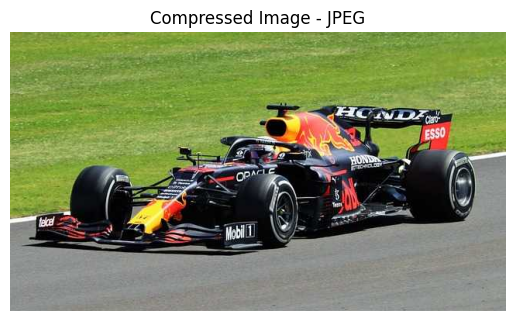

Image saved at compressed.jpg with quality 50


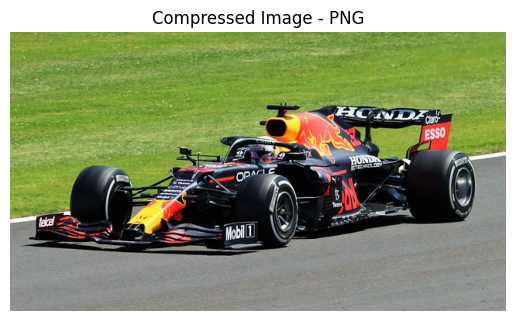

Image saved at compressed.png with quality 9


In [ ]:
compress_image('CV lab5 pic.jpg', 'compressed.jpg', quality=50, format='JPEG')
compress_image('CV lab5 pic.jpg', 'compressed.png', quality=9, format='PNG')

###TASK 2

In [ ]:
def train_mnist():
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
    x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
    x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)

    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=64)

    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    print(classification_report(y_true_classes, y_pred_classes))

    # Confusion Matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.show()

    return model

In [ ]:
def train_cifar10():
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=64)

    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    print(classification_report(y_true_classes, y_pred_classes))

    # Confusion Matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.show()

    return model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8422 - loss: 0.4983 - val_accuracy: 0.9842 - val_loss: 0.0495
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9722 - loss: 0.0932 - val_accuracy: 0.9873 - val_loss: 0.0334
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9798 - loss: 0.0661 - val_accuracy: 0.9895 - val_loss: 0.0309
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9844 - loss: 0.0514 - val_accuracy: 0.9902 - val_loss: 0.0337
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9876 - loss: 0.0439 - val_accuracy: 0.9923 - val_loss: 0.0240
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9889 - loss: 0.0359 - val_accuracy: 0.9920 - val_loss: 0.0210
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9904 - loss: 0.0320 - val_accuracy: 0.9937 - val_loss: 0.0209
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9913 - loss: 0.0273 - val_accuracy: 0.

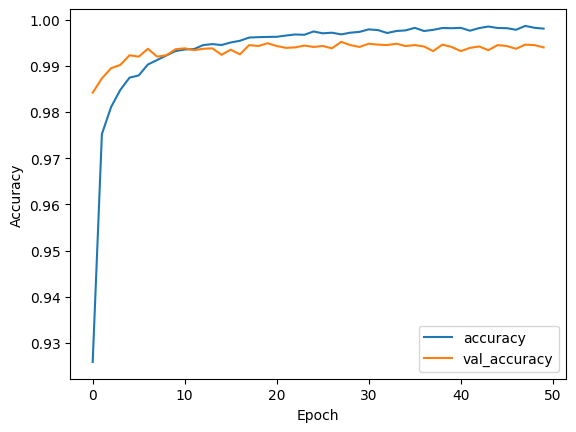

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       1.00      1.00      1.00      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



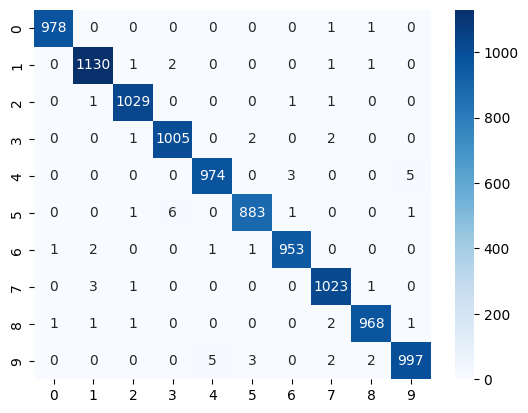

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2764 - loss: 1.9279 - val_accuracy: 0.5275 - val_loss: 1.3125
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5057 - loss: 1.3764 - val_accuracy: 0.5686 - val_loss: 1.2027
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5724 - loss: 1.2086 - val_accuracy: 0.6331 - val_loss: 1.0314
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6227 - loss: 1.0780 - val_accuracy: 0.6642 - val_loss: 0.9492
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6579 - loss: 0.9894 - val_accuracy: 0.6833 - val_loss: 0.9085
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6808 - loss: 0.9215 - val_accuracy: 0.6918 - val_loss: 0.8828
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7038 - loss: 0.8641 - val_accuracy: 0.6983 - val_loss: 0.8824
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7226 - loss: 0.8078 - val_accuracy: 0.

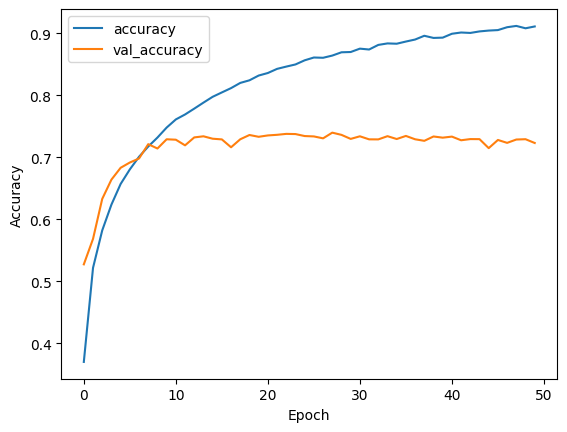

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      1000
           1       0.85      0.83      0.84      1000
           2       0.59      0.64      0.62      1000
           3       0.50      0.66      0.57      1000
           4       0.69      0.67      0.68      1000
           5       0.75      0.55      0.63      1000
           6       0.80      0.78      0.79      1000
           7       0.82      0.70      0.75      1000
           8       0.85      0.80      0.82      1000
           9       0.80      0.81      0.81      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.73     10000
weighted avg       0.73      0.72      0.73     10000



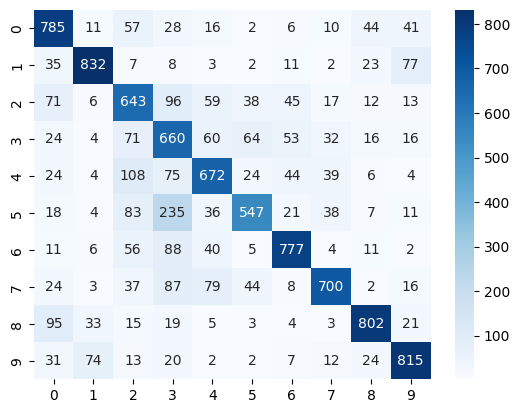

In [ ]:
 model_mnist = train_mnist()
 model_cifar10 = train_cifar10()